Content:
        Column names & Description
- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year with the following possible values
    - EN Entry-level
    - MI Junior Mid-level
    - SE Intermediate Senior-level
    - EX Expert Executive-level / Director
- employment_type: The type of employement for the role
    - PT Part-time
    - FT Full-time
    - CT Contract
    - FL Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely, possible values are as follows
    - 0 No remote work (less than 20%)
    - 50 Partially remote
    - 100 Fully remote (more than 80%)
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year
    - S less than 50 employees (small)
    - M 50 to 250 employees (medium)
    - L more than 250 employees (large)

In [32]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import pycountry                    # library to convert country codes
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


# Load dataset from an online source
url = 'https://raw.githubusercontent.com/AncaAl/Project-3/main/ds_salaries.csv'
df = pd.read_csv(url)

### Data wrangling

In [34]:
#change the name of the columns
df.rename(columns = {"company_location" : "country_code", "work_year" : "year"}, inplace=True)

In [35]:
# Function to convert a two-letter code to a full country name using pycountry

def convert_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)     # Lookup the country by alpha_2 code
        return country.name
    except KeyError:
        return code

df['country'] = df['country_code'].apply(convert_code_to_name)
df

year experience_level employment_type                 job_title  \
0     2023               SE              FT  Principal Data Scientist   
1     2023               MI              CT               ML Engineer   
2     2023               MI              CT               ML Engineer   
3     2023               SE              FT            Data Scientist   
4     2023               SE              FT            Data Scientist   
...    ...              ...             ...                       ...   
3750  2020               SE              FT            Data Scientist   
3751  2021               MI              FT  Principal Data Scientist   
3752  2020               EN              FT            Data Scientist   
3753  2020               EN              CT     Business Data Analyst   
3754  2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     country_code company_size        country  
0              ES            L          Spain  
1              US            S  United States  
2              US            S  United States  
3              CA            M         Canada  
4              CA            M         Canada  
...           ...          ...            ...  
3750           US            L  United States  
3751           US            L  United States  
3752           US            S  United States  
3753           US            L  United States  
3754           IN            L          India  

[3755 rows x 12 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   country_code        3755 non-null   object
 10  company_size        3755 non-null   object
 11  country             3755 non-null   object
dtypes: int64(4), object(8)
memory usage: 352.2+ KB


In [37]:
#changing the name of 2 columns:


In [38]:
# Summary for categorical variables
for column in df.describe(include=["O"]).columns:
    print(df[column].value_counts())
    print()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

employee_

In [41]:
sns.countplot(y='country', data=filtered_df)                          # Bar chart
plt.title("Top 10 countries - all df")

NameError: name 'filtered_df' is not defined

Text(0.5, 1.0, 'Spread of company size')

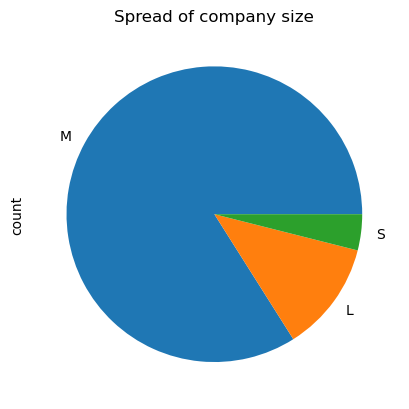

In [40]:
#Spread of company size
df['company_size'].value_counts().plot(kind='pie')
plt.title("Spread of company size") 

Text(0.5, 1.0, 'Spread of employment_type')

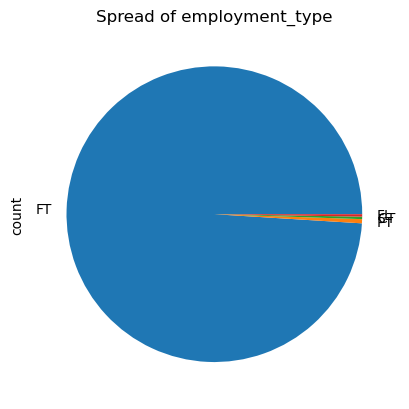

In [78]:
#Spread of experience_level
df['employment_type'].value_counts().plot(kind='pie')
#sns.countplot(x='employment_type', data = df) 
plt.title("Spread of employment_type") 

Text(0.5, 0, 'Entry-level, Junior Mid-level, Intermediate Senior-level, Expert Executive-level / Director')

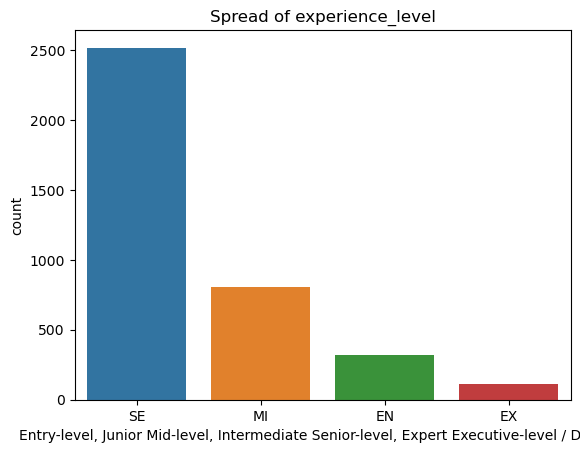

In [19]:
#Spread of experience_level
sns.countplot(x='experience_level', data = df) 
plt.title("Spread of experience_level") 

plt.xlabel("Entry-level, Junior Mid-level, Intermediate Senior-level, Expert Executive-level / Director") 

From the countplot above, we can notice that Senior-level/Expert represent ...%,  Mid-level/Intermediate ranked the next.
There's only ....% of Executive-level/Directior.

In [12]:
round(df.describe(include="number"),)

year      salary  salary_in_usd  remote_ratio
count  3755.0      3755.0         3755.0        3755.0
mean   2022.0    190696.0       137570.0          46.0
std       1.0    671677.0        63056.0          49.0
min    2020.0      6000.0         5132.0           0.0
25%    2022.0    100000.0        95000.0           0.0
50%    2022.0    138000.0       135000.0           0.0
75%    2023.0    180000.0       175000.0         100.0
max    2023.0  30400000.0       450000.0         100.0

In [76]:
# calculated the min, max, mean and median According to experience_level

experience_level_df = round(df.groupby('experience_level')['salary_in_usd'].agg(['min', 'max', 'mean', 'median']),1)

experience_level_map = {
    'EN': 'Entry Level',
    'EX': 'Executive Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level'
                        }

experience_level_df = experience_level_df.rename(index=experience_level_map)
experience_level_df

min     max      mean    median
experience_level                                   
Entry Level        5409  300000   78546.3   70000.0
Executive Level   15000  416000  194930.9  196000.0
Mid Level          5132  450000  104525.9  100000.0
Senior Level       8000  423834  153051.1  146000.0

In [65]:
# calculated the min, max, mean and median for each job in ITData industry
result = round(df.groupby('job_title')['salary_in_usd'].agg(['count','min', 'max', 'mean', 'median']),1)
sorted_result = result.sort_values(by='count', ascending=False)
sorted_result[0:10]

count    min     max      mean    median
job_title                                                          
Data Engineer               1040  12000  324000  142785.7  135000.0
Data Scientist               840   5679  412000  140869.8  141525.0
Data Analyst                 612   5723  430967  108716.2  106020.0
Machine Learning Engineer    289  12000  342300  154690.7  150000.0
Analytics Engineer           103   7500  289800  152368.6  143860.0
Data Architect               101  63000  376080  161713.8  160000.0
Research Scientist            82  23000  450000  161214.2  150000.0
Data Science Manager          58  54094  300000  191278.8  183780.0
Applied Scientist             58  72000  350000  190264.5  191737.5
Research Engineer             37  60000  293000  163108.4  155000.0

We can noticed that the mean and the median are almost the same; which means that the salary has a symmetrical distribution. 

In [45]:
df['year'] = df['year'].astype(str)   # change the datatype of the column year
# print(df.dtypes)

In [55]:
grouped_year = df.groupby('year')
grouped_year_2020 = grouped_year.get_group("2020")
grouped_year_2021 = grouped_year.get_group("2021")
grouped_year_2022 = grouped_year.get_group("2022")
grouped_year_2023 = grouped_year.get_group("2023")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Count'>

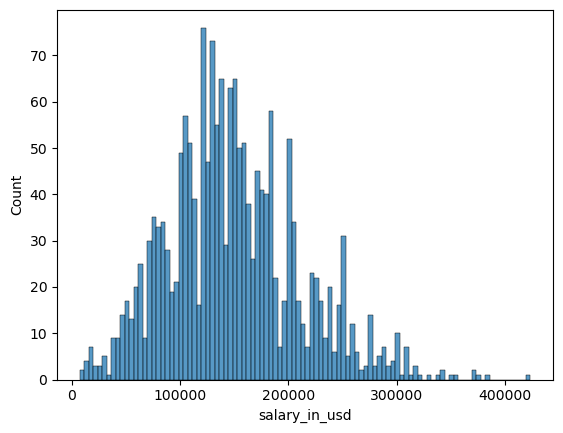

In [58]:
sns.histplot(grouped_year_2023['salary_in_usd'], bins=100) 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Count'>

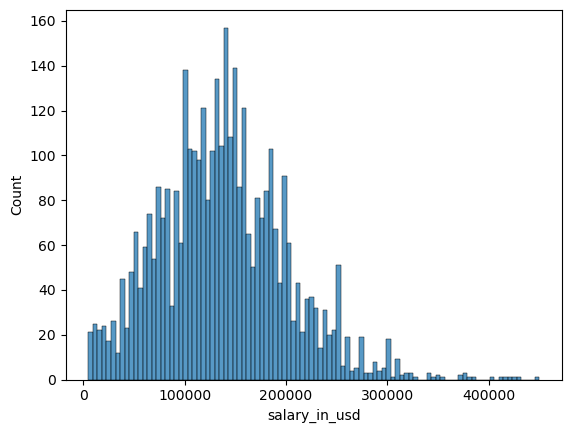

In [18]:
# the distribution of the salary
sns.histplot(df['salary_in_usd'], bins=100) 

In [64]:
pivot_df = df.pivot_table(index='job_title', columns='year', values=['salary_in_usd'], aggfunc='mean')
#sort_pivot_df = pivot_df.sort_values(ascending = True)
round(pivot_df,1)

salary_in_usd                              
year                                   2020      2021      2022      2023
job_title                                                                
3D Computer Vision Researcher           NaN   12704.5   30000.0       NaN
AI Developer                            NaN       NaN  193768.0  115252.9
AI Programmer                           NaN       NaN   40000.0   70000.0
AI Scientist                        45896.0   25410.6  140815.0  231232.5
Analytics Engineer                      NaN       NaN  137969.8  170210.7
...                                     ...       ...       ...       ...
Research Engineer                       NaN       NaN  207870.0  156114.4
Research Scientist                 246000.0   83003.6  142188.7  177539.9
Software Data Engineer                  NaN       NaN       NaN   62510.0
Staff Data Analyst                  15000.0       NaN       NaN       NaN
Staff Data Scientist                    NaN  105000.0       NaN       NaN

[93 rows x 4 columns]

#### Drafts

In [ ]:
#df.shape
#round(df.describe(),2)
#df.describe(include="object")
#df.info()
#df.columns
#df.nunique()
#df.work_year.nunique()
#df.work_year.unique()
#df.dtypes
#df.select_dtypes(include='number')
#df.select_dtypes(include='object')
#df.select_dtypes(include='number').max()

In [77]:
#Create a Dataframe -  I haven't used, yet
grouped_experience_level = df.groupby('experience_level')
# Creating a Dataframe by each experience_level - I haven't used, yet
grouped_experience_level_EN = grouped_experience_level .get_group('EN').head()    #EN Entry-level
grouped_experience_level_MI = grouped_experience_level .get_group('MI').head()   #MI Junior Mid-level
grouped_experience_level_SE = grouped_experience_level .get_group('SE').head()   #SE Intermediate Senior-level
grouped_experience_level_EX = grouped_experience_level .get_group('EX').head()   #EX Expert Executive-level / Director

In [ ]:
result1 = round(df.groupby('company_location_name')['job_title'].agg(['count']),1)
sorted_result1 = result1.sort_values(by='count', ascending=False)
sorted_result1[0:10]

In [ ]:
list(df.columns) 

In [ ]:
df.job_title.nunique()

In [ ]:
job_title_list = list(df.job_title.unique())
sorted(job_title_list)